The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1.) Who was being polled and what was their party affiliation?
2.) Did the poll results favor Romney or Obama?
3.) How do undecided voters effect the poll?
4.) Can we account for the undecided voters?
5.) How did voter sentiment change over time?
6.) Can we see an effect in the polls from the debates?



In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from io import StringIO

In [13]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

source=requests.get(url).text #Use request to get info from the website and text
#will read it as a text file

polldata=StringIO(source)

#Set data as dataframe
polldf=pd.read_csv(polldata)
polldf.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


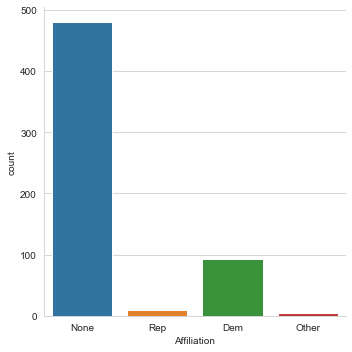

In [16]:
#QUESTION 1
# Factorplot the affiliation for the polls
sns.catplot(x='Affiliation',data=polldf,kind='count')


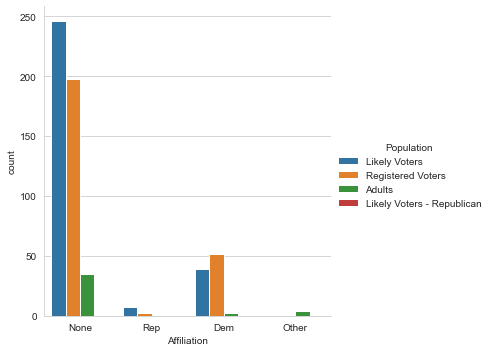

In [17]:
sns.catplot(x='Affiliation',data=polldf,kind='count',hue='Population')

C:\Users\Pragati Katiyar\AppData\Local\Temp\ipykernel_6044\2327981803.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg=pd.DataFrame(polldf.mean())
C:\Users\Pragati Katiyar\AppData\Local\Temp\ipykernel_6044\2327981803.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std=pd.DataFrame(polldf.std())


<AxesSubplot:>

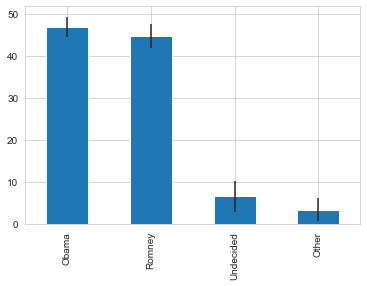

In [29]:
#QUESTION 2
#Get averages
avg=pd.DataFrame(polldf.mean())
avg.drop(['Number of Observations','Question Text','Question Iteration'],axis=0,inplace=True)

#Get std deviations
std=pd.DataFrame(polldf.std())
std.drop(['Number of Observations','Question Text','Question Iteration'],axis=0,inplace=True)

avg.plot(yerr=std,kind='bar',legend=False)


Interesting to see how close these polls seem to be, especially considering the undecided factor. Let's take a look at the numbers.

In [32]:
#QUESTION 3 and QUESTION 4
# Concatenate our Average and Std DataFrames
pollavg=pd.concat([avg,std],axis=1)

#Rename columns
pollavg.columns=['Average','STD']
pollavg


,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


<AxesSubplot:xlabel='End Date'>

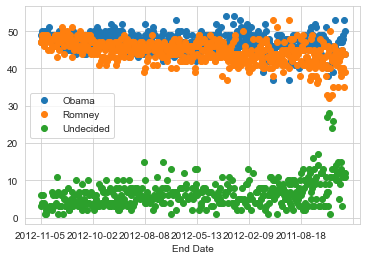

In [14]:
#QUESTION 5
#Time series analysis of voter sentiment
polldf.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')



325
352


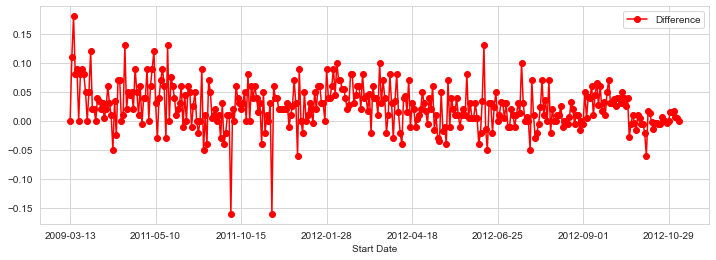

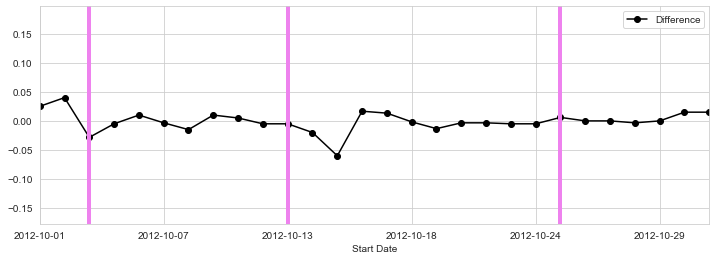

In [32]:
#QUESTION 5 CONTINUED
#Plot of Obama vs Romney difference
#New column for difference
polldf['Difference']=(polldf.Obama-polldf.Romney)/100
polldf.head()
 
polldf=polldf.groupby(['Start Date'],as_index=False).mean()
polldf.head()
polldf.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',
           color='red')

#QUESTION 6
#Mark down debates
#Find index for the month of October
rowin=0
xlimit=[]
for date in polldf['Start Date']:
    if date[0:7]=='2012-10':
        xlimit.append(rowin)
        rowin=rowin+1
    else:
        rowin=rowin+1
print(min(xlimit))
print(max(xlimit))
#so 325 and 352 are the max limits of x axis ie. of debates
#Plot
polldf.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',
           color='black',xlim=(325,352))
#Marker for debate on Oct 3rd
#2 days from Oct 1st so add 2 to min ie. 325
plt.axvline(x=325+2,linewidth=4,color='violet')
#Marker for debate on Oct 11th
plt.axvline(x=325+10,linewidth=4,color='violet')
#Marker for debate on Oct 22nd
plt.axvline(x=325+21,linewidth=4,color='violet')
